# Machine Learning 1

https://github.com/MichalKorzycki/WarsztatPythonDataScience

Plik: `MachineLearning1.ipynb`

---

## Nauczanie Maszynowe (_Machine Learning_)

- Z nadzorem (_supervised_)
- Bez nadzoru (_unsupervised_)

## Nauczanie Maszynowe bez nadzoru
- Klasteryzacja
- Reguły asocjacyjne

## Nauczanie Maszynowe z nadzorem
- Klasyfikacja 
- Regresja

---
​
### Dla zmiennych tłumaczących `X` szukamy funkcji `f` która jak najlepiej odzwierciedli nam dane tłumaczone `y`
​
$$ 
y \approx f (X)
$$
​

---


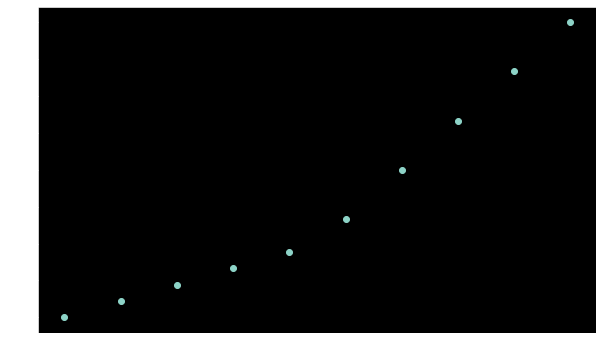

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,6))
plt.style.use("dark_background")

x = np.linspace(-2, 2, 10)
plt.scatter(x, x+0.5*np.abs(x));

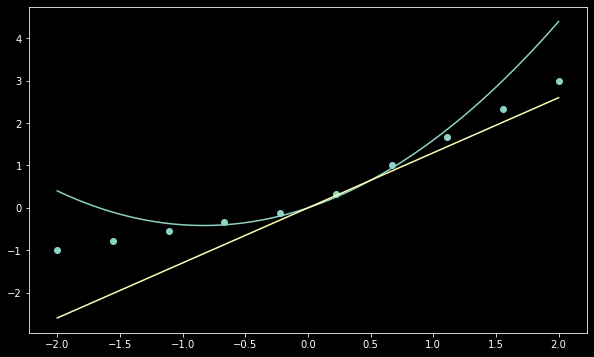

In [8]:
plt.figure(figsize=(10,6))
plt.style.use("dark_background")
x = np.linspace(-2, 2, 100)
plt.plot(x, x+0.6*x*x)
plt.plot(x, 1.3*x)
x = np.linspace(-2, 2, 10)
plt.scatter(x, x+0.5*np.abs(x));

---

https://www.gumtree.pl/a-mieszkania-i-domy-sprzedam-i-kupie/praga-polnoc/mieszkanie-inwestycyjne-4+pok-przy-metrze-wilenska-targowa-70/1007172232370910500042709

---

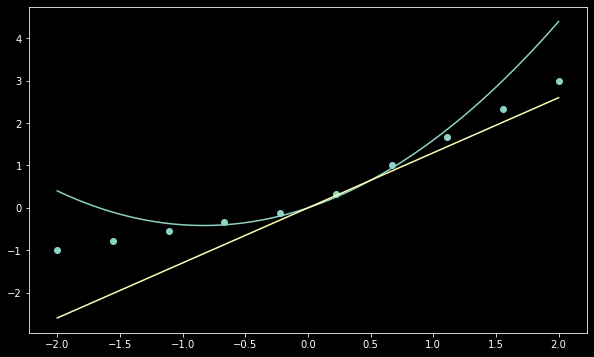

In [6]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('adverts_29_04.csv', sep=';')
data

,Cena,Data dodania,Lokalizacja,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking
0,519000,03/04/2020,"Praga Północ, Warszawa",Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN
1,619000,03/04/2020,"Wilanów, Warszawa",Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica
2,950000,27/01/2020,"Wilanów, Warszawa",Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż
3,655000,22/04/2020,"Śródmieście, Warszawa",Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak
4,576248,22/04/2020,"Wola, Warszawa",Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN
...,...,...,...,...,...,...,...,...,...,...
982,699000,22/04/2020,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN
983,645000,22/04/2020,"Mokotów, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN
984,1380000,22/04/2020,"Wawer, Warszawa",Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN
985,569000,22/04/2020,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN


In [15]:
data['cena_za_metr'] = data['Cena'] / data['Wielkość (m2)']
data = data.dropna(subset=['cena_za_metr'])
df = data.drop(['Cena', 'Data dodania'], axis=1)
df

,Lokalizacja,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking,cena_za_metr
0,"Praga Północ, Warszawa",Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN,10380.000000
1,"Wilanów, Warszawa",Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica,11679.245283
2,"Wilanów, Warszawa",Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż,10555.555556
3,"Śródmieście, Warszawa",Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak,11909.090909
4,"Wola, Warszawa",Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN,12805.511111
...,...,...,...,...,...,...,...,...,...
982,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN,9445.945946
983,"Mokotów, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN,9772.727273
984,"Wawer, Warszawa",Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN,8625.000000
985,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN,7794.520548


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

label_encoded = df

label_encoded['Lokalizacja_Cat'] = labelencoder.fit_transform(label_encoded['Lokalizacja'])
label_encoded

,Lokalizacja,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking,cena_za_metr,Lokalizacja_Cat
0,"Praga Północ, Warszawa",Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN,10380.000000,6
1,"Wilanów, Warszawa",Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica,11679.245283,13
2,"Wilanów, Warszawa",Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż,10555.555556,13
3,"Śródmieście, Warszawa",Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak,11909.090909,16
4,"Wola, Warszawa",Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN,12805.511111,14
...,...,...,...,...,...,...,...,...,...,...
982,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN,9445.945946,0
983,"Mokotów, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN,9772.727273,3
984,"Wawer, Warszawa",Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN,8625.000000,11
985,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN,7794.520548,0


In [17]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(label_encoded[['Lokalizacja_Cat']]).toarray())

one_hot_data = label_encoded.join(enc_df)
one_hot_data

,Lokalizacja,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking,cena_za_metr,Lokalizacja_Cat,...,8,9,10,11,12,13,14,15,16,17
0,"Praga Północ, Warszawa",Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN,10380.000000,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Wilanów, Warszawa",Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica,11679.245283,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"Wilanów, Warszawa",Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż,10555.555556,13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"Śródmieście, Warszawa",Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak,11909.090909,16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"Wola, Warszawa",Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN,12805.511111,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN,9445.945946,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
983,"Mokotów, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN,9772.727273,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
984,"Wawer, Warszawa",Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN,8625.000000,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
985,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN,7794.520548,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
dum_df = pd.get_dummies(df, columns=['Lokalizacja'])
dum_df

,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking,cena_za_metr,Lokalizacja_Cat,"Lokalizacja_Bemowo, Warszawa",...,"Lokalizacja_Targówek, Warszawa","Lokalizacja_Ursus, Warszawa","Lokalizacja_Ursynów, Warszawa","Lokalizacja_Wawer, Warszawa","Lokalizacja_Wesoła, Warszawa","Lokalizacja_Wilanów, Warszawa","Lokalizacja_Wola, Warszawa","Lokalizacja_Włochy, Warszawa","Lokalizacja_Śródmieście, Warszawa","Lokalizacja_Żoliborz, Warszawa"
0,Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN,10380.000000,6,0,...,0,0,0,0,0,0,0,0,0,0
1,Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica,11679.245283,13,0,...,0,0,0,0,0,1,0,0,0,0
2,Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż,10555.555556,13,0,...,0,0,0,0,0,1,0,0,0,0
3,Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak,11909.090909,16,0,...,0,0,0,0,0,0,0,0,1,0
4,Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN,12805.511111,14,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN,9445.945946,0,1,...,0,0,0,0,0,0,0,0,0,0
983,Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN,9772.727273,3,0,...,0,0,0,0,0,0,0,0,0,0
984,Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN,8625.000000,11,0,...,0,0,0,1,0,0,0,0,0,0
985,Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN,7794.520548,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
import pandas as pd

data = pd.read_csv('adverts_29_04.csv', sep=';')
data['cena_za_metr'] = data['Cena'] / data['Wielkość (m2)']
data = data.dropna(subset=['cena_za_metr'])
df = data.drop(['Cena', 'Data dodania'], axis=1)
df

,Lokalizacja,Na sprzedaż przez,Rodzaj nieruchomości,Liczba pokoi,Liczba łazienek,Wielkość (m2),opis,Parking,cena_za_metr
0,"Praga Północ, Warszawa",Właściciel,Mieszkanie,4 pokoje,1 łazienka,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,NaN,10380.000000
1,"Wilanów, Warszawa",Właściciel,Mieszkanie,2 pokoje,1 łazienka,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,Ulica,11679.245283
2,"Wilanów, Warszawa",Właściciel,Mieszkanie,3 pokoje,2 łazienki,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,Garaż,10555.555556
3,"Śródmieście, Warszawa",Agencja,Mieszkanie,2 pokoje,NaN,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,Brak,11909.090909
4,"Wola, Warszawa",Agencja,Mieszkanie,2 pokoje,1 łazienka,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",NaN,12805.511111
...,...,...,...,...,...,...,...,...,...
982,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,NaN,9445.945946
983,"Mokotów, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",NaN,9772.727273
984,"Wawer, Warszawa",Agencja,Dom,4 pokoje,NaN,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,NaN,8625.000000
985,"Bemowo, Warszawa",Agencja,Mieszkanie,3 pokoje,NaN,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,NaN,7794.520548


In [20]:
dum_df = pd.get_dummies(data, columns=['Lokalizacja', 'Na sprzedaż przez', 'Rodzaj nieruchomości', 'Liczba pokoi', 'Liczba łazienek', 'Parking'])
dum_df

,Cena,Data dodania,Wielkość (m2),opis,cena_za_metr,"Lokalizacja_Bemowo, Warszawa","Lokalizacja_Białołęka, Warszawa","Lokalizacja_Bielany, Warszawa","Lokalizacja_Mokotów, Warszawa","Lokalizacja_Ochota, Warszawa",...,Liczba pokoi_6 lub więcej pokoi,Liczba pokoi_Kawalerka lub garsoniera,Liczba łazienek_1 łazienka,Liczba łazienek_2 łazienki,Liczba łazienek_3 łazienki,Liczba łazienek_4 lub więcej łazienek,Parking_Brak,Parking_Garaż,Parking_Kryty,Parking_Ulica
0,519000,03/04/2020,50.0,CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\...,10380.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,619000,03/04/2020,53.0,Sprzedam mieszkanie 2 pokoje 53m2 w\r\nMiastec...,11679.245283,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,950000,27/01/2020,90.0,Sprzedam komfortowo urządzone mieszkanie o pow...,10555.555556,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,655000,22/04/2020,55.0,Agencja WN pracuje podczas pandemii. Prowadzim...,11909.090909,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,576248,22/04/2020,45.0,"BLISKA WOLA , komfortowy 2- pokojowy apartamen...",12805.511111,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,699000,22/04/2020,74.0,Mieszkanie Bemowo przy budowanym metrze\n\nNa ...,9445.945946,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,645000,22/04/2020,66.0,"Blok z wielkiej płyty z roku 1992, PO REMONCIE...",9772.727273,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
984,1380000,22/04/2020,160.0,Na sprzedaż nowoczesny dom 4-pokojowy w zabud...,8625.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
985,569000,22/04/2020,73.0,Na sprzedaż mieszkanie w apartamentowcu wybud...,7794.520548,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dum_df.columns

Index(['Cena', 'Data dodania', 'Wielkość (m2)', 'opis', 'cena_za_metr',
       'Lokalizacja_Bemowo, Warszawa', 'Lokalizacja_Białołęka, Warszawa',
       'Lokalizacja_Bielany, Warszawa', 'Lokalizacja_Mokotów, Warszawa',
       'Lokalizacja_Ochota, Warszawa', 'Lokalizacja_Praga Południe, Warszawa',
       'Lokalizacja_Praga Północ, Warszawa', 'Lokalizacja_Rembertów, Warszawa',
       'Lokalizacja_Targówek, Warszawa', 'Lokalizacja_Ursus, Warszawa',
       'Lokalizacja_Ursynów, Warszawa', 'Lokalizacja_Wawer, Warszawa',
       'Lokalizacja_Wesoła, Warszawa', 'Lokalizacja_Wilanów, Warszawa',
       'Lokalizacja_Wola, Warszawa', 'Lokalizacja_Włochy, Warszawa',
       'Lokalizacja_Śródmieście, Warszawa', 'Lokalizacja_Żoliborz, Warszawa',
       'Na sprzedaż przez_Agencja', 'Na sprzedaż przez_Właściciel',
       'Rodzaj nieruchomości_Dom', 'Rodzaj nieruchomości_Inne',
       'Rodzaj nieruchomości_Mieszkanie', 'Liczba pokoi_2 pokoje',
       'Liczba pokoi_3 pokoje', 'Liczba pokoi_4 pokoje',
    

In [ ]:
dum_df.corr()['cena_za_metr']

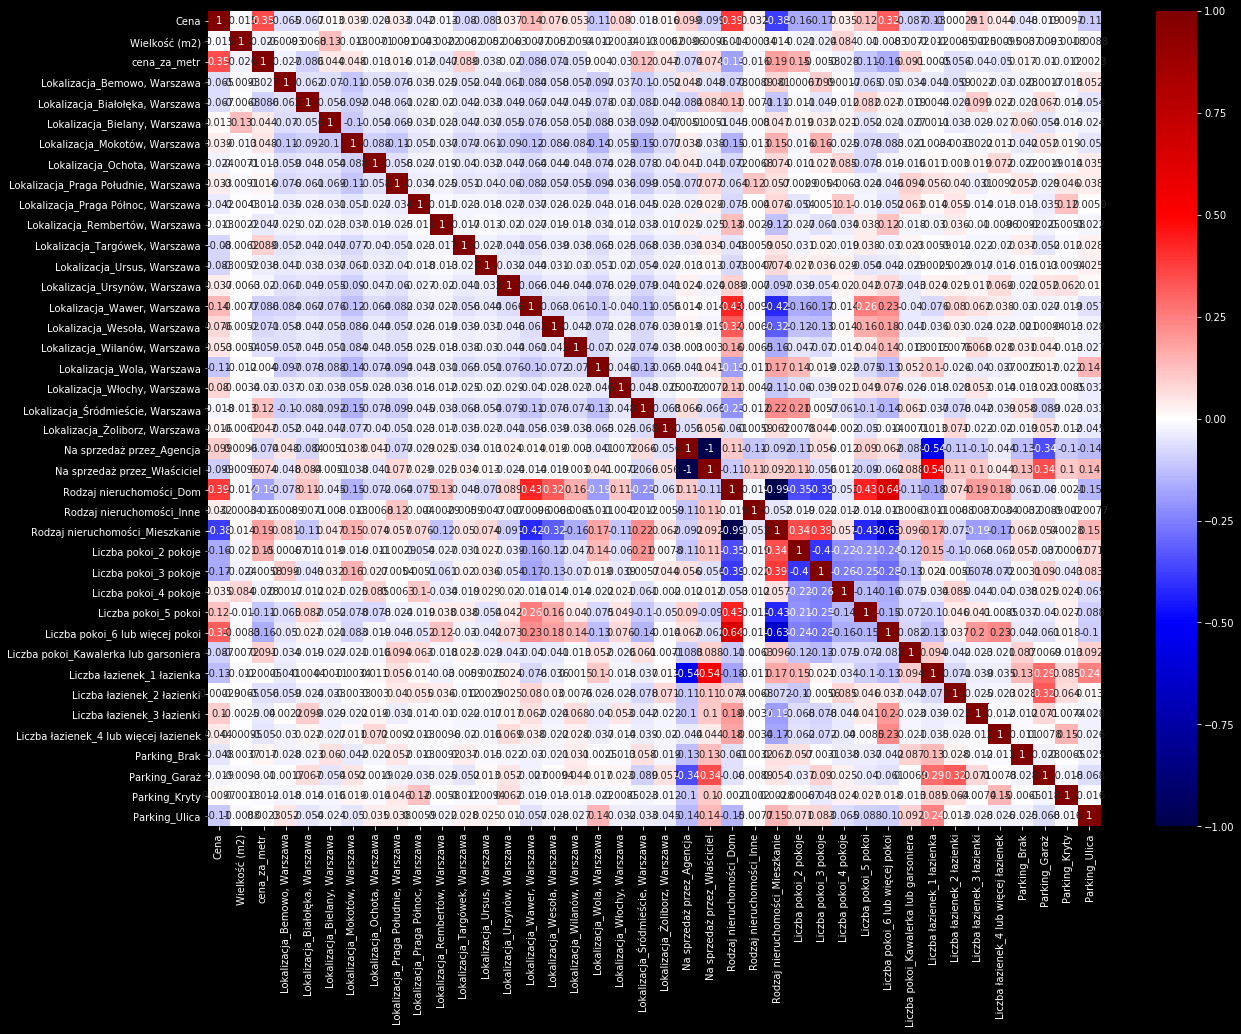

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(20,15))
plt.style.use("dark_background")

sns.heatmap(dum_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [45]:
from sklearn.linear_model import LinearRegression

y = dum_df['cena_za_metr']
X = dum_df.drop(['opis', 'Data dodania'], axis=1)

reg = LinearRegression().fit(X, y)

In [46]:
reg.score(X,y)

1.0

In [47]:
X = dum_df.drop(['cena_za_metr', 'opis', 'Data dodania', 'Cena'], axis=1)

reg = LinearRegression().fit(X, y)
reg.score(X,y)

0.24874304298642624

---

## Co z opisem ?

In [48]:
opis1 = dum_df['opis'][0]
opis1

'CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\r\n [GDZIE] - Warszawa, Praga-Północ , Targowa 70\n\r\n [OPIS] - Oferujemy wyremontowane mieszkanie składające się z 4 \r\nniezależnych pokoi , 1 łazienka (prysznic ),WC , oddzielnej kuchni . \r\nprzychód roczny na poziomie 6% netto (już po odjęciu czynszu \r\noczywiście ). \n\r\nDobra komunikacja \r\nMetro Wileńska przy wyjściu z budynku\n\r\nObok Galeria Wileńska , liczne sklepy \r\nw pobliżu park i zoo\n\r\nMieszkanie jest umeblowane i ma sprzęt AGD \n\r\nMieszkanie własnościowe z KW . \n\r\nAmortyzacja przyśpieszona 10%\n\r\n CHĘTNIE ZAJMIEMY SIĘ ZARZĄDZANIEM NAJMU W TEJ INWESTYCJI \n\r\n Pozwól nam pracować i zarabiać też , a sobie pozwól na wakacje i na lokatę wyższą niż w banku \n \r\nJarek 608840585'

In [49]:
import re

r = re.compile(r'[^ąąćęńłóóśśżżź\w]+')
tokenized = r.split(opis1)
l = list(tokenized)
str(l)

"['CO', 'gotowiec', 'inwestycyjny', 'KUP', 'I', 'ZARABIAJ', 'GDZIE', 'Warszawa', 'Praga', 'Północ', 'Targowa', '70', 'OPIS', 'Oferujemy', 'wyremontowane', 'mieszkanie', 'składające', 'się', 'z', '4', 'niezależnych', 'pokoi', '1', 'łazienka', 'prysznic', 'WC', 'oddzielnej', 'kuchni', 'przychód', 'roczny', 'na', 'poziomie', '6', 'netto', 'już', 'po', 'odjęciu', 'czynszu', 'oczywiście', 'Dobra', 'komunikacja', 'Metro', 'Wileńska', 'przy', 'wyjściu', 'z', 'budynku', 'Obok', 'Galeria', 'Wileńska', 'liczne', 'sklepy', 'w', 'pobliżu', 'park', 'i', 'zoo', 'Mieszkanie', 'jest', 'umeblowane', 'i', 'ma', 'sprzęt', 'AGD', 'Mieszkanie', 'własnościowe', 'z', 'KW', 'Amortyzacja', 'przyśpieszona', '10', 'CHĘTNIE', 'ZAJMIEMY', 'SIĘ', 'ZARZĄDZANIEM', 'NAJMU', 'W', 'TEJ', 'INWESTYCJI', 'Pozwól', 'nam', 'pracować', 'i', 'zarabiać', 'też', 'a', 'sobie', 'pozwól', 'na', 'wakacje', 'i', 'na', 'lokatę', 'wyższą', 'niż', 'w', 'banku', 'Jarek', '608840585']"

## _Lematyzacja_ - sprowadzenie wyrazu do formy podstawowej tak aby różne formy tego wyrazu (*kot*, *kota*, *kotu*) były rozpatrywane jako ten sam wyraz (*kot*) 

https://sjp.pl/
    
Słownik SJP.PL
Słownik języka polskiego, ortograficzny, wyrazów obcych i słownik do gier w jednym.

Słownik jest rozwijany z myślą o zastosowaniu do sprawdzania pisowni w programach open-source, do gier słownych (np. literaki) i do użytku online jako kilka rodzajów słowników w jednym.

Redakcją słownika zajmują się hobbyści.

Słownik jest udostępniany na otwartych licencjach (różnych w zależności od wersji).

In [34]:
import gzip
import sys
import re

f = gzip.open('odm.txt.gz', 'rt', encoding='utf-8')
dictionary = {}

for x in f:
    t = x.strip().split(',')
    tt = [ x.strip().lower() for x in t]
    for w in tt[1:]: 
        dictionary[w]=tt[0]

def lematize(w):
    w = w.replace('ą','ą')
    w = w.replace('ó','ó')
    w = w.replace('ę','ę')
    w = w.replace('ż','ż')
    return dictionary.get(w,w)



In [35]:
lematize('pracowałem')

'pracować'

In [41]:
opis1

'CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\r\n [GDZIE] - Warszawa, Praga-Północ , Targowa 70\n\r\n [OPIS] - Oferujemy wyremontowane mieszkanie składające się z 4 \r\nniezależnych pokoi , 1 łazienka (prysznic ),WC , oddzielnej kuchni . \r\nprzychód roczny na poziomie 6% netto (już po odjęciu czynszu \r\noczywiście ). \n\r\nDobra komunikacja \r\nMetro Wileńska przy wyjściu z budynku\n\r\nObok Galeria Wileńska , liczne sklepy \r\nw pobliżu park i zoo\n\r\nMieszkanie jest umeblowane i ma sprzęt AGD \n\r\nMieszkanie własnościowe z KW . \n\r\nAmortyzacja przyśpieszona 10%\n\r\n CHĘTNIE ZAJMIEMY SIĘ ZARZĄDZANIEM NAJMU W TEJ INWESTYCJI \n\r\n Pozwól nam pracować i zarabiać też , a sobie pozwól na wakacje i na lokatę wyższą niż w banku \n \r\nJarek 608840585'

In [42]:
import re

splitter = re.compile(r'[^ąąćęńłóóśśżżź\w]+')
isnumber = re.compile(r'[0-9]')


def preprocessing(opis):
    opis = str(opis)
    tokenized = splitter.split(opis)
    l = list(tokenized)
    l = [ x.lower() for x in l ]
    l = [ x for x in l if isnumber.search(x) is None ]
    l = [ lematize(x) for x in l ]
    return l

In [43]:
print(preprocessing(opis1))

['co', 'gotowiec', 'inwestycyjny', 'kupić', 'i', 'zarabiać', 'gdzie', 'warszawa', 'praga', 'północ', 'targowy', 'opis', 'oferować', 'wyremontować', 'mieszkać', 'składać', 'siebie', 'z', 'zależny', 'pokój', 'łazienka', 'prysznic', 'wc', 'oddzielny', 'kuchnia', 'przychód', 'roczny', 'na', 'poziom', 'netto', 'już', 'po', 'odjąć', 'czynsz', 'oczywiście', 'dobry', 'komunikacja', 'metro', 'wileński', 'przy', 'wyjść', 'z', 'budynek', 'obok', 'galeria', 'wileński', 'liczny', 'sklep', 'w', 'pobliże', 'park', 'i', 'zoo', 'mieszkać', 'być', 'umeblować', 'i', 'mój', 'sprzęt', 'agd', 'mieszkać', 'własnościowe', 'z', 'kw', 'amortyzacja', 'przyśpieszyć', 'chętny', 'zająć', 'siebie', 'zarządzać', 'najem', 'w', 'ten', 'inwestycja', 'pozwolić', 'my', 'pracować', 'i', 'zarabiać', 'tenże', 'a', 'siebie', 'pozwolić', 'na', 'wakacje', 'i', 'na', 'lokata', 'wyższy', 'nizać', 'w', 'bank', 'jarka']


In [55]:
raw_corpus=[]
n=0

for i in dum_df.iterrows():
    n+=1
    l = list(splitter.split(i[1][3]))
    raw_corpus.append(l)

    
all_words = []
for t in raw_corpus:
    all_words[0:0] = t

print(f'Słów: {len(all_words)} z {n} dokumentów')
    
words = {}
for w in all_words:
    rec = words.get(w.lower(), {'upper':0, 'lower': 0})
    if w.lower()==w:
        rec['lower'] = rec['lower'] +1
    else: 
        rec['upper'] = rec['upper'] +1
    words[w.lower()] = rec

print(len(words))

raw_stop_words = [ x for x in words.keys() if words[x]['upper']>=words[x]['lower']*8 ]   
print(len(raw_stop_words))
print(raw_stop_words[:100])



Słów: 220004 z 986 dokumentów
17583
3727
['niniejsza', 'kodeksu', 'cywilnego', 'numer', '214370126lokalizacja', 'mazowieckie', 'warszawa', 'bemowo', 'wrocławska', 'oferta', 'trimo', 'development', 'fresh', 'lazurowa', 'istotnym', 's8', 'a2', 'tesco', 'wola', 'górczewska', '211290126lokalizacja', 'wawer', 'poprawna', 'kosmatki', 'ch', 'promenada', 'mazowieckiego', 'krajobrazowego', 'pośrednik', 'robert', 'brzozowski', 'prezentowane', 'dokładamy', 'ponieważ', 'brz', 'ds', '155904lokalizacja', 'ii', 'iii', 'służew', 'ursynów', 'służewieckim', 'dolinka', 'służewiecka', '219780126lokalizacja', 'mokotów', 'gorneje', 'bosch', 'liebherri', 'lg', '212340126lokalizacja', 'tadeusza', 'pełczyńskiego', 'warszawy', 'służewcu', '233220126lokalizacja', 'woli', 'klif', 'arsenał', '227920126lokalizacja', 'aleja', 'solidarności', 'ochocie', 'szczęśliwicki', '209100126lokalizacja', 'ochota', 'dickensa', 'stara', 'narutowicza', 'lotnika', 'lubeckiego', 'och', 'mokotowskie', 'sue', 'ryder', 'po

In [57]:
set_raw_stop_words = set(raw_stop_words)

def preprocessing(opis):
    opis = str(opis)
    tokenized = splitter.split(opis)
    l = list(tokenized)
    l = [ x.lower() for x in l ]
    l = [ x for x in l if len(x) > 4]
    l = [ x for x in l if isnumber.search(x) is None ]
    l = [ x for x in l if x not in set_raw_stop_words ]
    l = [ lematize(x) for x in l ]
    l = [ x for x in l if len(x) > 3]
    return l

In [58]:
opis1

'CO] - gotowiec inwestycyjny KUP I ZARABIAJ \n\r\n [GDZIE] - Warszawa, Praga-Północ , Targowa 70\n\r\n [OPIS] - Oferujemy wyremontowane mieszkanie składające się z 4 \r\nniezależnych pokoi , 1 łazienka (prysznic ),WC , oddzielnej kuchni . \r\nprzychód roczny na poziomie 6% netto (już po odjęciu czynszu \r\noczywiście ). \n\r\nDobra komunikacja \r\nMetro Wileńska przy wyjściu z budynku\n\r\nObok Galeria Wileńska , liczne sklepy \r\nw pobliżu park i zoo\n\r\nMieszkanie jest umeblowane i ma sprzęt AGD \n\r\nMieszkanie własnościowe z KW . \n\r\nAmortyzacja przyśpieszona 10%\n\r\n CHĘTNIE ZAJMIEMY SIĘ ZARZĄDZANIEM NAJMU W TEJ INWESTYCJI \n\r\n Pozwól nam pracować i zarabiać też , a sobie pozwól na wakacje i na lokatę wyższą niż w banku \n \r\nJarek 608840585'

In [59]:
print(preprocessing(opis1))

['gotowiec', 'inwestycyjny', 'gdzie', 'północ', 'wyremontować', 'mieszkać', 'składać', 'zależny', 'pokój', 'łazienka', 'prysznic', 'oddzielny', 'kuchnia', 'przychód', 'roczny', 'poziom', 'netto', 'odjąć', 'czynsz', 'oczywiście', 'dobry', 'komunikacja', 'metro', 'wyjść', 'budynek', 'galeria', 'liczny', 'sklep', 'pobliże', 'mieszkać', 'umeblować', 'sprzęt', 'mieszkać', 'własnościowe', 'przyśpieszyć', 'chętny', 'najem', 'inwestycja', 'pozwolić', 'pracować', 'zarabiać', 'siebie', 'pozwolić', 'wakacje', 'lokata', 'wyższy', 'bank']
